In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing, Noramalizing
from sklearn.preprocessing import StandardScaler

#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [2]:
mobile = pd.read_csv(r"https://raw.githubusercontent.com/Abhiky9339/Datasets/main/MOBIE%20DATASTES.csv")
mobile

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN


In [3]:
scraped = pd.read_csv(r'https://raw.githubusercontent.com/Abhiky9339/Datasets/main/Flipkart_Mobiles.csv')
scraped

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [4]:
df = pd.concat([mobile, scraped], axis = 0)
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990.0,25990.0
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489.0,28449.0
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239.0,31489.0
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989.0,22989.0


In [5]:
df.duplicated().sum()

1072

In [6]:
df.drop_duplicates(ignore_index = True, inplace = True)
df.shape

(4689, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4689 non-null   object 
 1   Model           4687 non-null   object 
 2   Color           4556 non-null   object 
 3   Memory          4612 non-null   object 
 4   Storage         4594 non-null   object 
 5   Rating          4559 non-null   float64
 6   Selling Price   4686 non-null   float64
 7   Original Price  3083 non-null   float64
dtypes: float64(3), object(5)
memory usage: 293.2+ KB


In [8]:
df.isnull().sum()

Brand                0
Model                2
Color              133
Memory              77
Storage             95
Rating             130
Selling Price        3
Original Price    1606
dtype: int64

In [9]:
#filling null values using simple imputer technique
from sklearn.impute import  SimpleImputer

In [10]:
numerical_features = [ 'Selling Price', 'Original Price']
categorical_features = ['Brand', 'Model', 'Color','Memory', 'Storage', 'Rating']

# Creating the transformers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [11]:
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

# Imputing missing categorical values
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [12]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [13]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [14]:
from faker import Faker
import random

In [15]:
def generate_smartphone_data(num_records):
    fake = Faker()
    data = []
    for _ in range(num_records):

        camera = random.randrange(15, 60,5)

        battery = random.randint(2000, 5000)
        display = random.uniform(4.5, 7.0)

        network_type = random.choice(['4G', '5G'])
        fast_charge = random.choice([True, False])


        data.append([camera, battery, display, network_type, fast_charge])

    columns = [ 'Camera in pixcels',  'Battery', 'Display', 'Network Type', 'Fast Charge']
    return pd.DataFrame(data, columns=columns)

# Generate synthetic data
num_records = 4689
df1 = generate_smartphone_data(num_records)

In [16]:
df1

,Camera in pixcels,Battery,Display,Network Type,Fast Charge
0,15,2698,4.716294,4G,False
1,55,4372,6.740709,4G,False
2,20,3385,5.730726,5G,True
3,40,3333,6.368999,5G,True
4,20,4118,5.203029,5G,False
...,...,...,...,...,...
4684,50,3568,6.671250,4G,True
4685,30,4051,5.681883,5G,True
4686,35,4966,6.549903,4G,True
4687,50,4527,6.188660,4G,True


In [17]:

data = pd.concat([df, df1], axis=1)


In [18]:
data

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Camera in pixcels,Battery,Display,Network Type,Fast Charge
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,15,2698,4.716294,4G,False
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,55,4372,6.740709,4G,False
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,20,3385,5.730726,5G,True
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,40,3333,6.368999,5G,True
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,20,4118,5.203029,5G,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990.0,25990.0,50,3568,6.671250,4G,True
4685,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489.0,28449.0,30,4051,5.681883,5G,True
4686,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239.0,31489.0,35,4966,6.549903,4G,True
4687,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989.0,22989.0,50,4527,6.188660,4G,True


In [19]:
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Camera in pixcels,Battery,Display,Network Type,Fast Charge
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,15,2698,4.716294,4G,False
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,55,4372,6.740709,4G,False
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,20,3385,5.730726,5G,True
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,40,3333,6.368999,5G,True
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,20,4118,5.203029,5G,False


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              4689 non-null   object 
 1   Model              4689 non-null   object 
 2   Color              4689 non-null   object 
 3   Memory             4689 non-null   object 
 4   Storage            4689 non-null   object 
 5   Rating             4689 non-null   object 
 6   Selling Price      4689 non-null   float64
 7   Original Price     4689 non-null   float64
 8   Camera in pixcels  4689 non-null   int64  
 9   Battery            4689 non-null   int64  
 10  Display            4689 non-null   float64
 11  Network Type       4689 non-null   object 
 12  Fast Charge        4689 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 444.3+ KB


From the above information we can see that the columns Camera in pixcels and Battery and battery are having data types as int however we know that they represent categorical data. We shall their data type into object dtype

In [21]:
data[['Camera in pixcels', 'Battery','Display']] = data[['Camera in pixcels', 'Battery','Display']].astype('object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              4689 non-null   object 
 1   Model              4689 non-null   object 
 2   Color              4689 non-null   object 
 3   Memory             4689 non-null   object 
 4   Storage            4689 non-null   object 
 5   Rating             4689 non-null   object 
 6   Selling Price      4689 non-null   float64
 7   Original Price     4689 non-null   float64
 8   Camera in pixcels  4689 non-null   object 
 9   Battery            4689 non-null   object 
 10  Display            4689 non-null   object 
 11  Network Type       4689 non-null   object 
 12  Fast Charge        4689 non-null   bool   
dtypes: bool(1), float64(2), object(10)
memory usage: 444.3+ KB


Now we can see that all the columns are having the correct datatypes. There are three dataypes object(10), float(2), boolean(1). There are no null values

In [23]:
# checking value_counts for each column of the dataset
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

SAMSUNG         1157
Apple            537
realme           433
OPPO             378
Nokia            364
Xiaomi           299
GIONEE           235
Lenovo           225
ASUS             221
LG               178
Motorola         160
vivo             155
Infinix          150
POCO              75
HTC               60
Google Pixel      57
IQOO               5
Name: Brand, dtype: int64


iPhone 11             40
iPhone 13 Pro Max     36
3                     35
iPhone 6s Plus        32
Zenfone Selfie        32
                      ..
ROG                    1
Razr 5G                1
Pioneer P3             1
W10                    1
Y30                    1
Name: Model, Length: 914, dtype: int64


Black              837
Gold               339
White              267
Blue               221
Silver             175
                  ... 
Mist Blue            1
Pebble Grey          1
Stainless Black      1
Bold Red             1
Smokey Gray          1
Name: Color, Length: 654, dtype: int64


4 GB 

In [24]:
data['Discount']=data['Original Price']-data['Selling Price']


In [25]:
#Encoding the columns of network type and fast charge using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Network Type'] = le.fit_transform(data['Network Type'])
data['Fast Charge'] = le.fit_transform(data['Fast Charge'])
data['Memory'] = le.fit_transform(data['Memory'])
data['Storage'] = le.fit_transform(data['Storage'])

Observations:
1. Third quartile and mx value has huge difference there seems to be an outlier however the highest selling price of phone is 179900 and hihgest original price is 189999.
2. Mean of both the columns is less than the median , there might be skewness we shall check with the visualisation plots



In [26]:
data.describe()

,Memory,Storage,Selling Price,Original Price,Network Type,Fast Charge,Discount
count,4689.00000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000
mean,17.52058,16.753679,25968.894366,27411.700616,0.507997,0.507997,1442.806250
std,7.10958,8.122863,30665.991123,25029.686803,0.499989,0.499989,19738.703383
min,0.00000,0.000000,1000.000000,1000.000000,0.000000,0.000000,-152488.299384
25%,13.00000,11.000000,9000.000000,12999.000000,0.000000,0.000000,0.000000
50%,19.00000,18.000000,14990.000000,27411.700616,1.000000,1.000000,500.000000
75%,24.00000,25.000000,27330.000000,27411.700616,1.000000,1.000000,7686.700616
max,30.00000,32.000000,179900.000000,189999.000000,1.000000,1.000000,75000.000000


# Data Visualisation
## Univariate Analysis

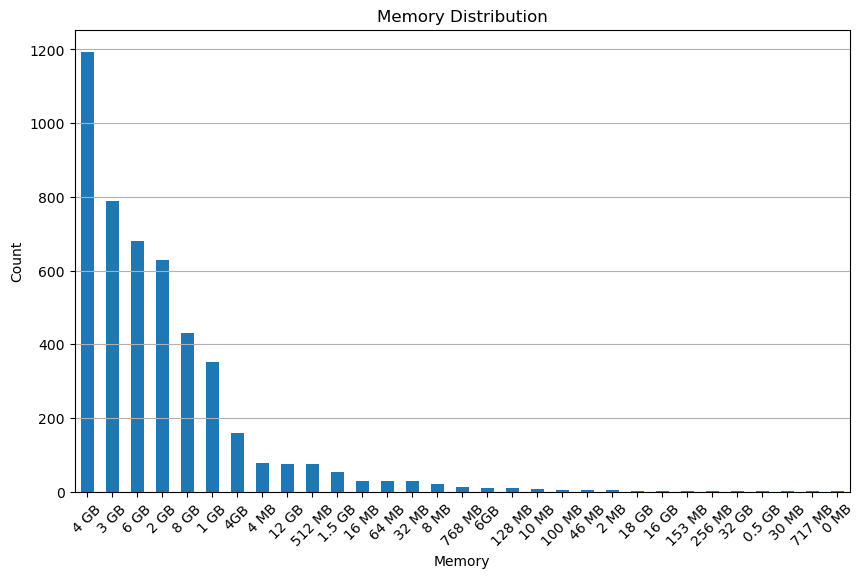

In [27]:
plt.figure(figsize=(10, 6))
df['Memory'].value_counts().plot(kind='bar')
plt.title('Memory Distribution')
plt.xlabel('Memory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

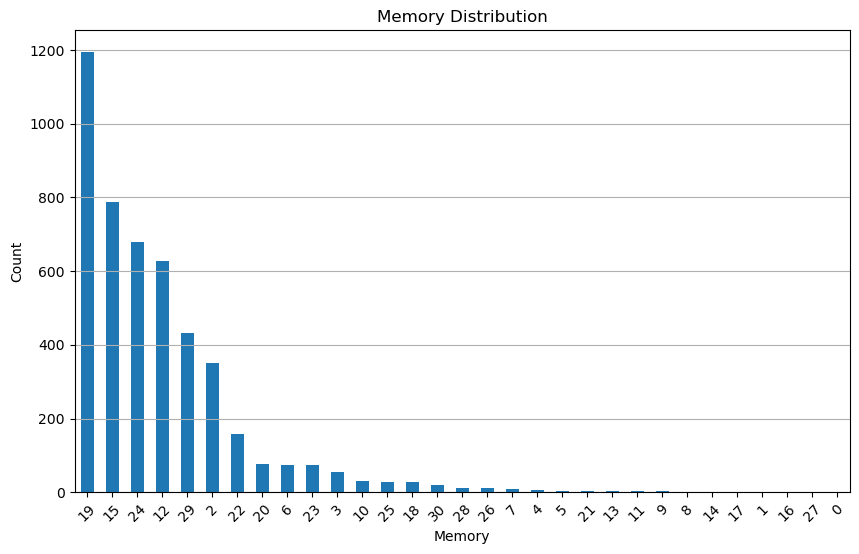

In [28]:
invalid_memory_values = ['768 MB', '128 MB', '10 MB', '2 MB', '46 MB', '18 GB', '16 GB', '153 MB', '30 MB', '100 MB','8 MB','32 MB', '16 MB']

data = data[~data['Memory'].isin(invalid_memory_values)]

plt.figure(figsize=(10, 6))
data['Memory'].value_counts().plot(kind='bar')
plt.title('Memory Distribution')
plt.xlabel('Memory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [29]:
data['Storage'].value_counts()

25    1203
5     1002
18     870
11     563
16     313
29     252
23     110
20     102
21      56
13      46
32      24
31      24
2       23
6       22
12      20
30      10
26       6
22       6
17       6
4        4
24       4
14       4
7        3
0        2
1        2
3        2
10       2
9        2
8        2
15       1
19       1
28       1
27       1
Name: Storage, dtype: int64

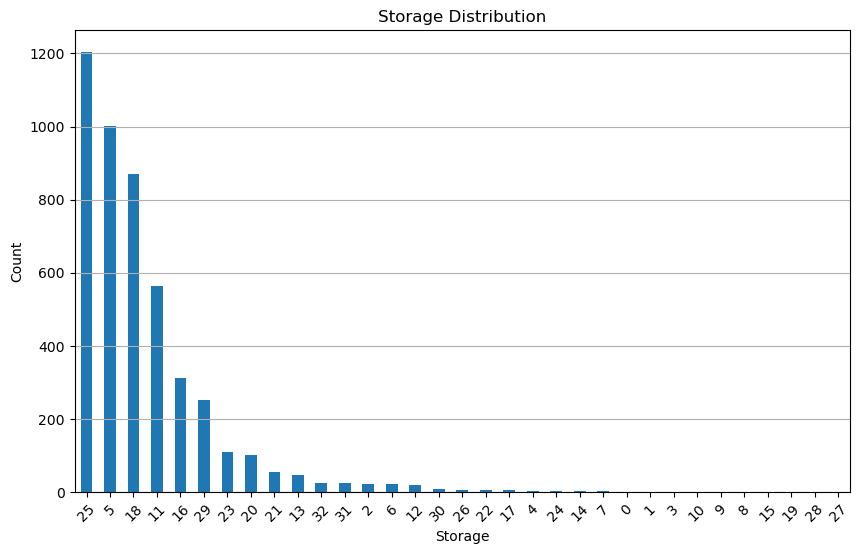

In [30]:
invalid_storage_values = [ 'Expandable Upto 16 GB','Expandable Upto 32 GB','8 MB', '256 MB', '129 GB', '130 GB', '65 GB','2.3 MB','64GB GB', '512 MB', '10 MB', '100 MB', '140 MB', '2.27 MB']

data = data[~data['Storage'].isin(invalid_storage_values)]

plt.figure(figsize=(10, 6))
data['Storage'].value_counts().plot(kind='bar')
plt.title('Storage Distribution')
plt.xlabel('Storage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [31]:
data_grouped = data.groupby('Brand')['Brand'].count()
data_grouped

Brand
ASUS             221
Apple            537
GIONEE           235
Google Pixel      57
HTC               60
IQOO               5
Infinix          150
LG               178
Lenovo           225
Motorola         160
Nokia            364
OPPO             378
POCO              75
SAMSUNG         1157
Xiaomi           299
realme           433
vivo             155
Name: Brand, dtype: int64

<AxesSubplot:title={'center':'market share'}, ylabel='Brand'>

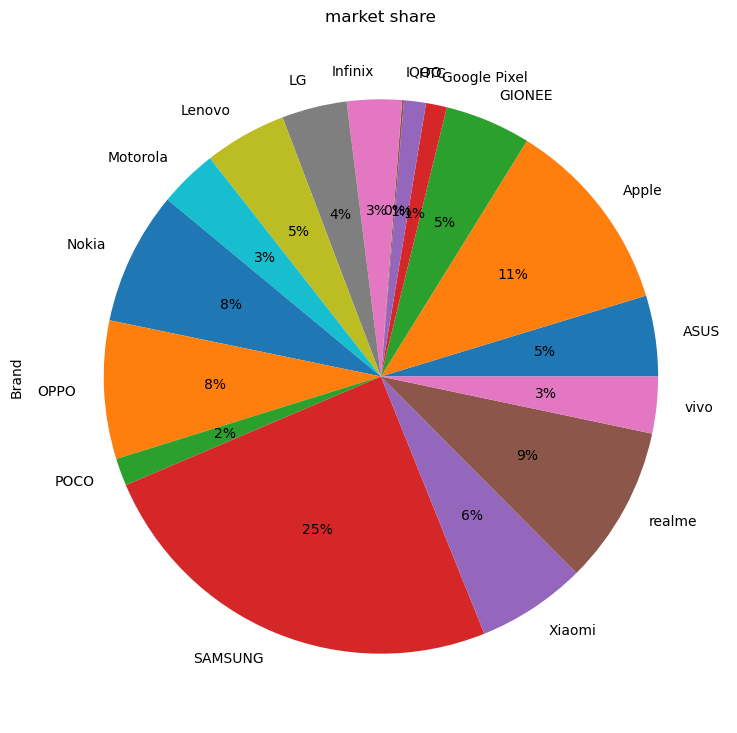

In [32]:
data_grouped_pie = data_grouped.plot.pie(autopct='%1.0f%%', figsize=(9, 9), title='market share')
data_grouped_pie

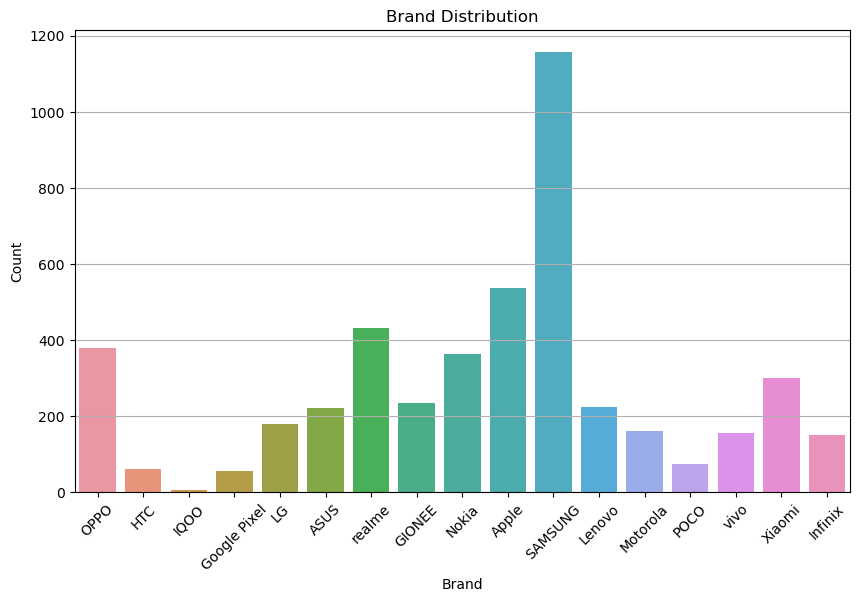

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=data)
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [34]:
data_Samsung = data.loc[data['Brand'].isin(['SAMSUNG'])]
data_Samsung

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Camera in pixcels,Battery,Display,Network Type,Fast Charge,Discount
1398,SAMSUNG,Galaxy F22,Denim Blue,24,5,4.3,14999.0,16999.0,20,3447,6.6193,1,0,2000.0
1399,SAMSUNG,Galaxy F22,Denim Blue,19,25,4.3,12999.0,14999.0,35,4843,4.985915,1,1,2000.0
1400,SAMSUNG,Galaxy F22,Denim Black,24,5,4.3,14999.0,16999.0,15,4459,5.699844,1,1,2000.0
1401,SAMSUNG,Galaxy F22,Denim Black,19,25,4.3,12999.0,14999.0,20,2560,5.012835,0,1,2000.0
1402,SAMSUNG,Galaxy F12,Sky Blue,19,25,4.2,11499.0,12999.0,50,2312,4.942975,0,1,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,SAMSUNG,M52 5G,Blazing Black,24,5,4.3,25990.0,25990.0,50,3568,6.67125,0,1,0.0
4685,SAMSUNG,M52 5G,Icy Blue,24,5,4.3,25489.0,28449.0,30,4051,5.681883,1,1,2960.0
4686,SAMSUNG,M52 5G,Icy Blue,29,5,4.3,27239.0,31489.0,35,4966,6.549903,0,1,4250.0
4687,SAMSUNG,M52 5G,Slate Black,29,5,4.2,22989.0,22989.0,50,4527,6.18866,0,1,0.0


In [35]:
data_Samsung1 = data_Samsung.groupby(['Brand', 'Model'])['Model'].count().reset_index(name='count')
data_Samsung1['count'].astype(str).astype(int)
data_Samsung1.head()

,Brand,Model,count
0,SAMSUNG,B350,2
1,SAMSUNG,B351E/Metro 350,6
2,SAMSUNG,Fold 2 5G,2
3,SAMSUNG,GALAXY M31S,1
4,SAMSUNG,GALAXY M51,2


<AxesSubplot:xlabel='Model'>

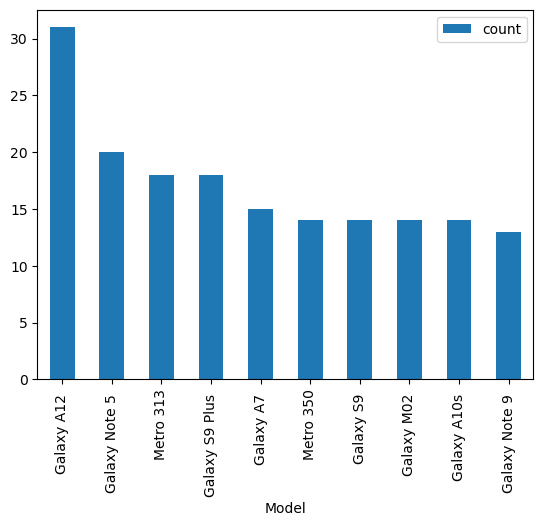

In [36]:
data_Samsung_ordered = data_Samsung1.sort_values(["count"], ascending = False)
data_Samsung1_1 = data_Samsung_ordered.iloc[:10]
data_Samsung1_1.plot(x="Model", y=["count"], kind="bar")

In [37]:
data_Apple = data.loc[data['Brand'].isin(['Apple'])]
data_Apple_Models = data_Apple.groupby(['Brand', 'Model'])['Model'].count()
data_Apple_Models

Brand  Model             
Apple  iPhone 11             38
       iPhone 11 Pro         23
       iPhone 11 Pro Max     22
       iPhone 12             18
       iPhone 12 Mini        18
       iPhone 12 Pro         22
       iPhone 12 Pro Max     24
       iPhone 13             17
       iPhone 13 Mini        26
       iPhone 13 Pro          1
       iPhone 13 Pro         24
       iPhone 13 Pro Max     19
       iPhone 13 Pro Max     36
       iPhone 13 mini         2
       iPhone 6              22
       iPhone 6 Plus         14
       iPhone 6s              2
       iPhone 6s             28
       iPhone 6s Plus        32
       iPhone 7              27
       iPhone 7 Plus         28
       iPhone 8               7
       iPhone 8 Plus         16
       iPhone SE             15
       iPhone X               8
       iPhone XR             24
       iPhone XS             12
       iPhone XS Max         12
Name: Model, dtype: int64

In [38]:
outer = data_Apple_Models.groupby('Brand').sum()
inner = data_Apple_Models.groupby(['Brand','Model']).sum()

In [39]:
inner_labels = inner.index.get_level_values(1)

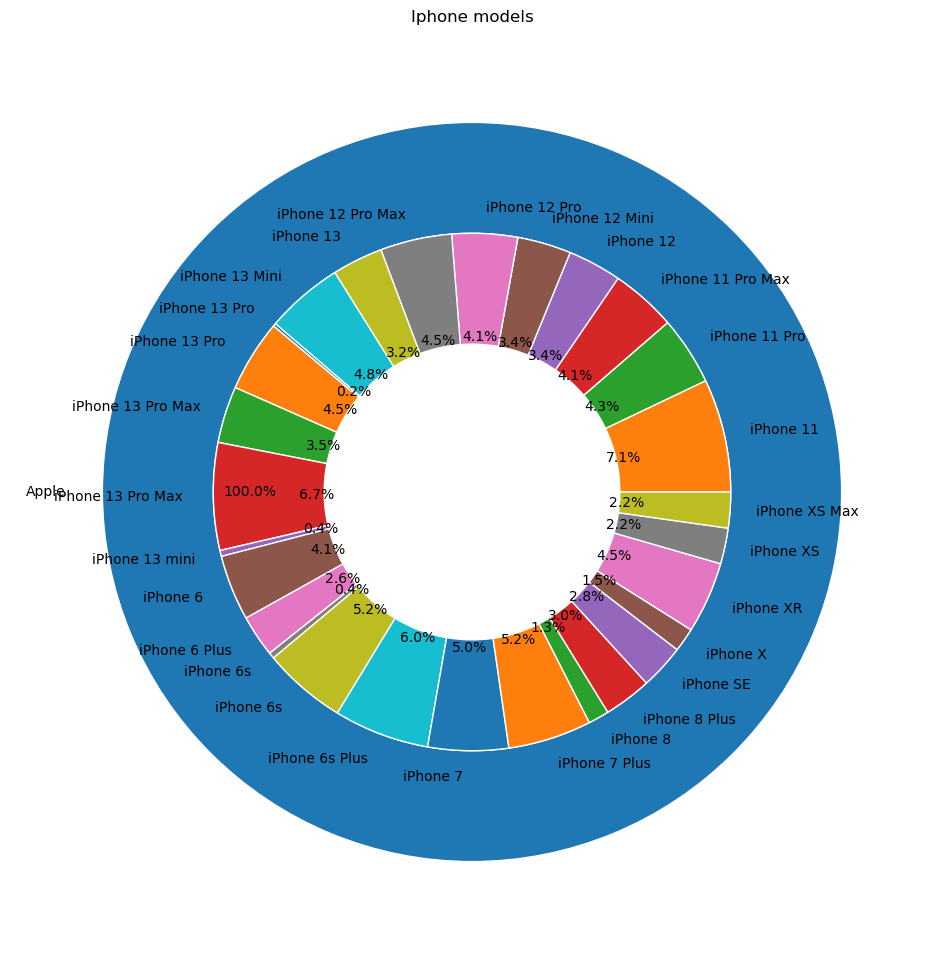

In [40]:


fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size,
       labels = inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Iphone models')
plt.show()

In [41]:
data_realme = data.loc[data['Brand'].isin(['realme'])]
data_realme_models = data_realme.groupby(['Brand', 'Model'])['Model'].count()
data_realme_models

Brand   Model      
realme  1              23
        2              12
        3              11
        3i              5
        5 Pro           8
                       ..
        X50 Pro         6
        X50 Pro 5G      2
        X7 5G           4
        X7 Max          6
        X7 Pro 5G       1
Name: Model, Length: 62, dtype: int64

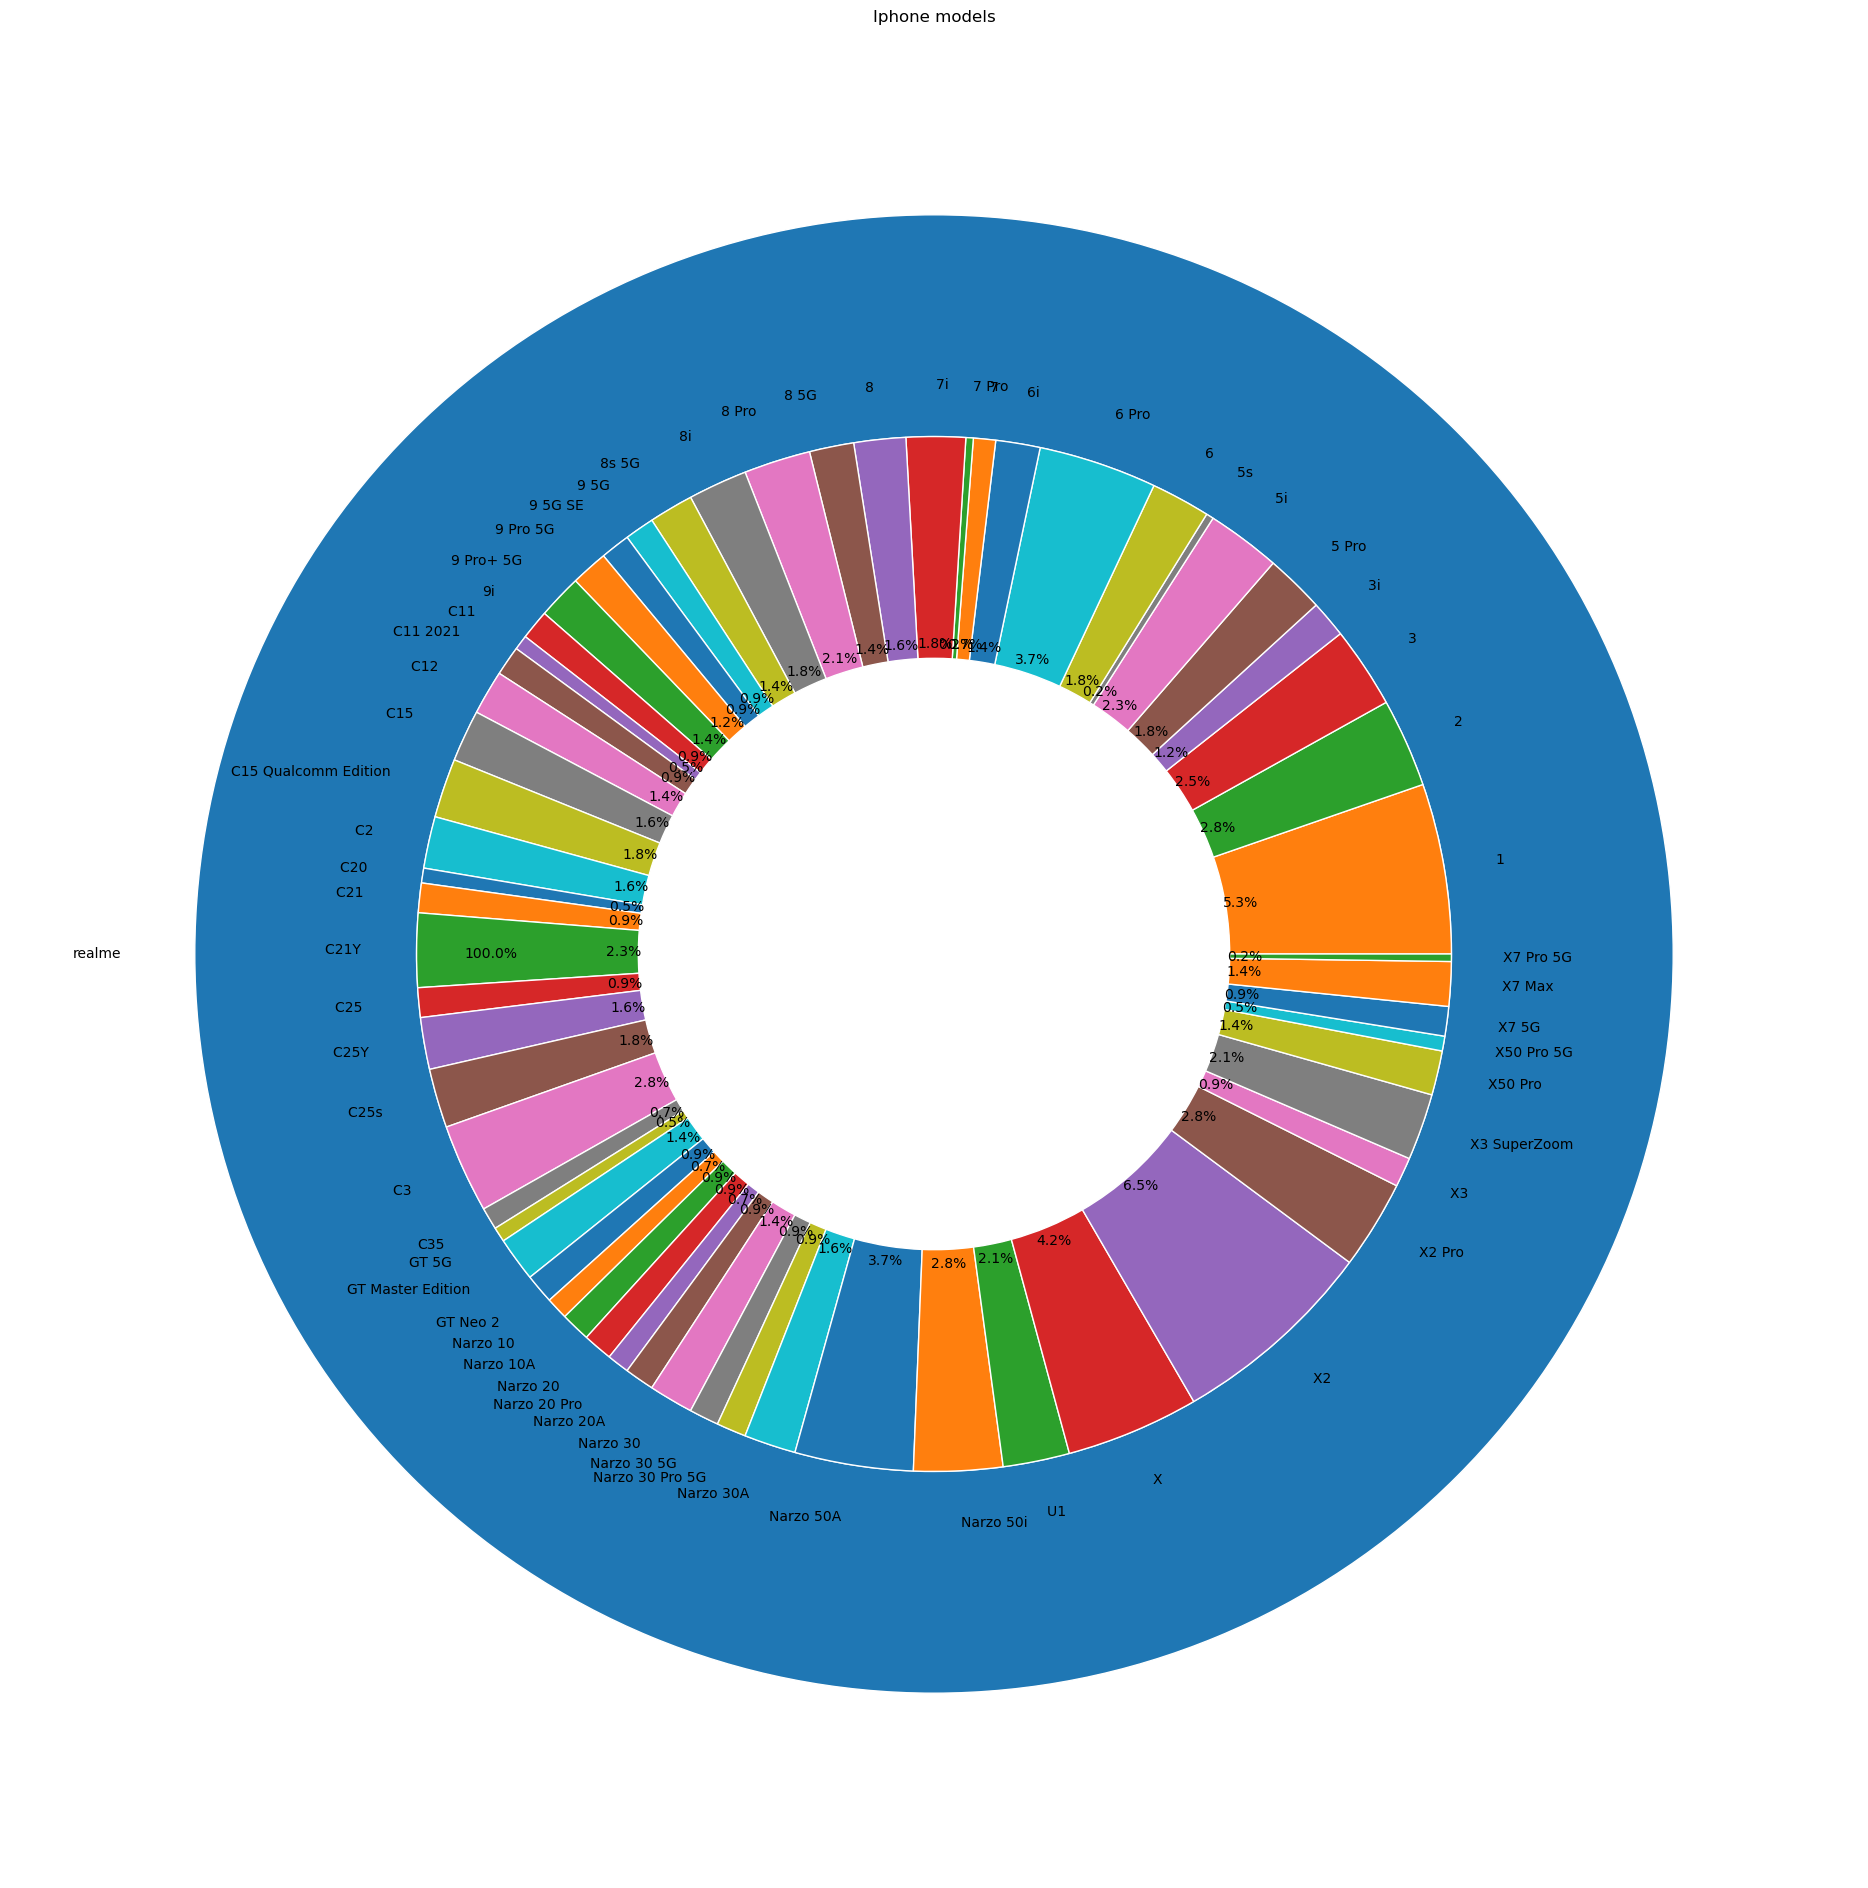

In [42]:
outer = data_realme_models.groupby('Brand').sum()
inner = data_realme_models.groupby(['Brand','Model']).sum()
inner_labels = inner.index.get_level_values(1)
fig, ax = plt.subplots(figsize=(36,24))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size,
       labels = inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Iphone models')
plt.show()

In [43]:


numerical_features = [
    'Selling Price',
    'Original Price',
    'Camera in pixcels',
    'Battery',
    'Display',
    'Discount'
]

categorical_features = [
    'Brand',
    'Model',
    'Color',
    'Memory',
    'Storage',
    'Rating',
    'Network Type',
    'Fast Charge'
]


C:\Users\AbhilashKY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AbhilashKY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AbhilashKY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

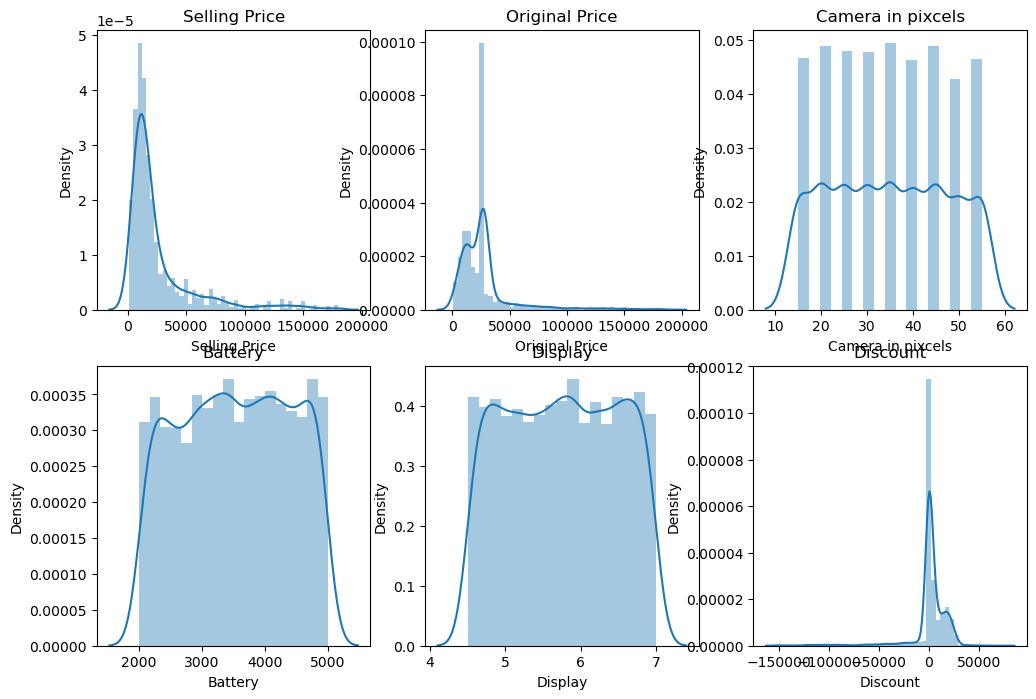

In [44]:
plt.figure(figsize = (12,8))
c = 1
for i in numerical_features:
  if c<=6:
    plt.subplot(2,3,c)
    sns.distplot(data[i], kde = True)
    plt.title(i)
  c+=1
plt.show()

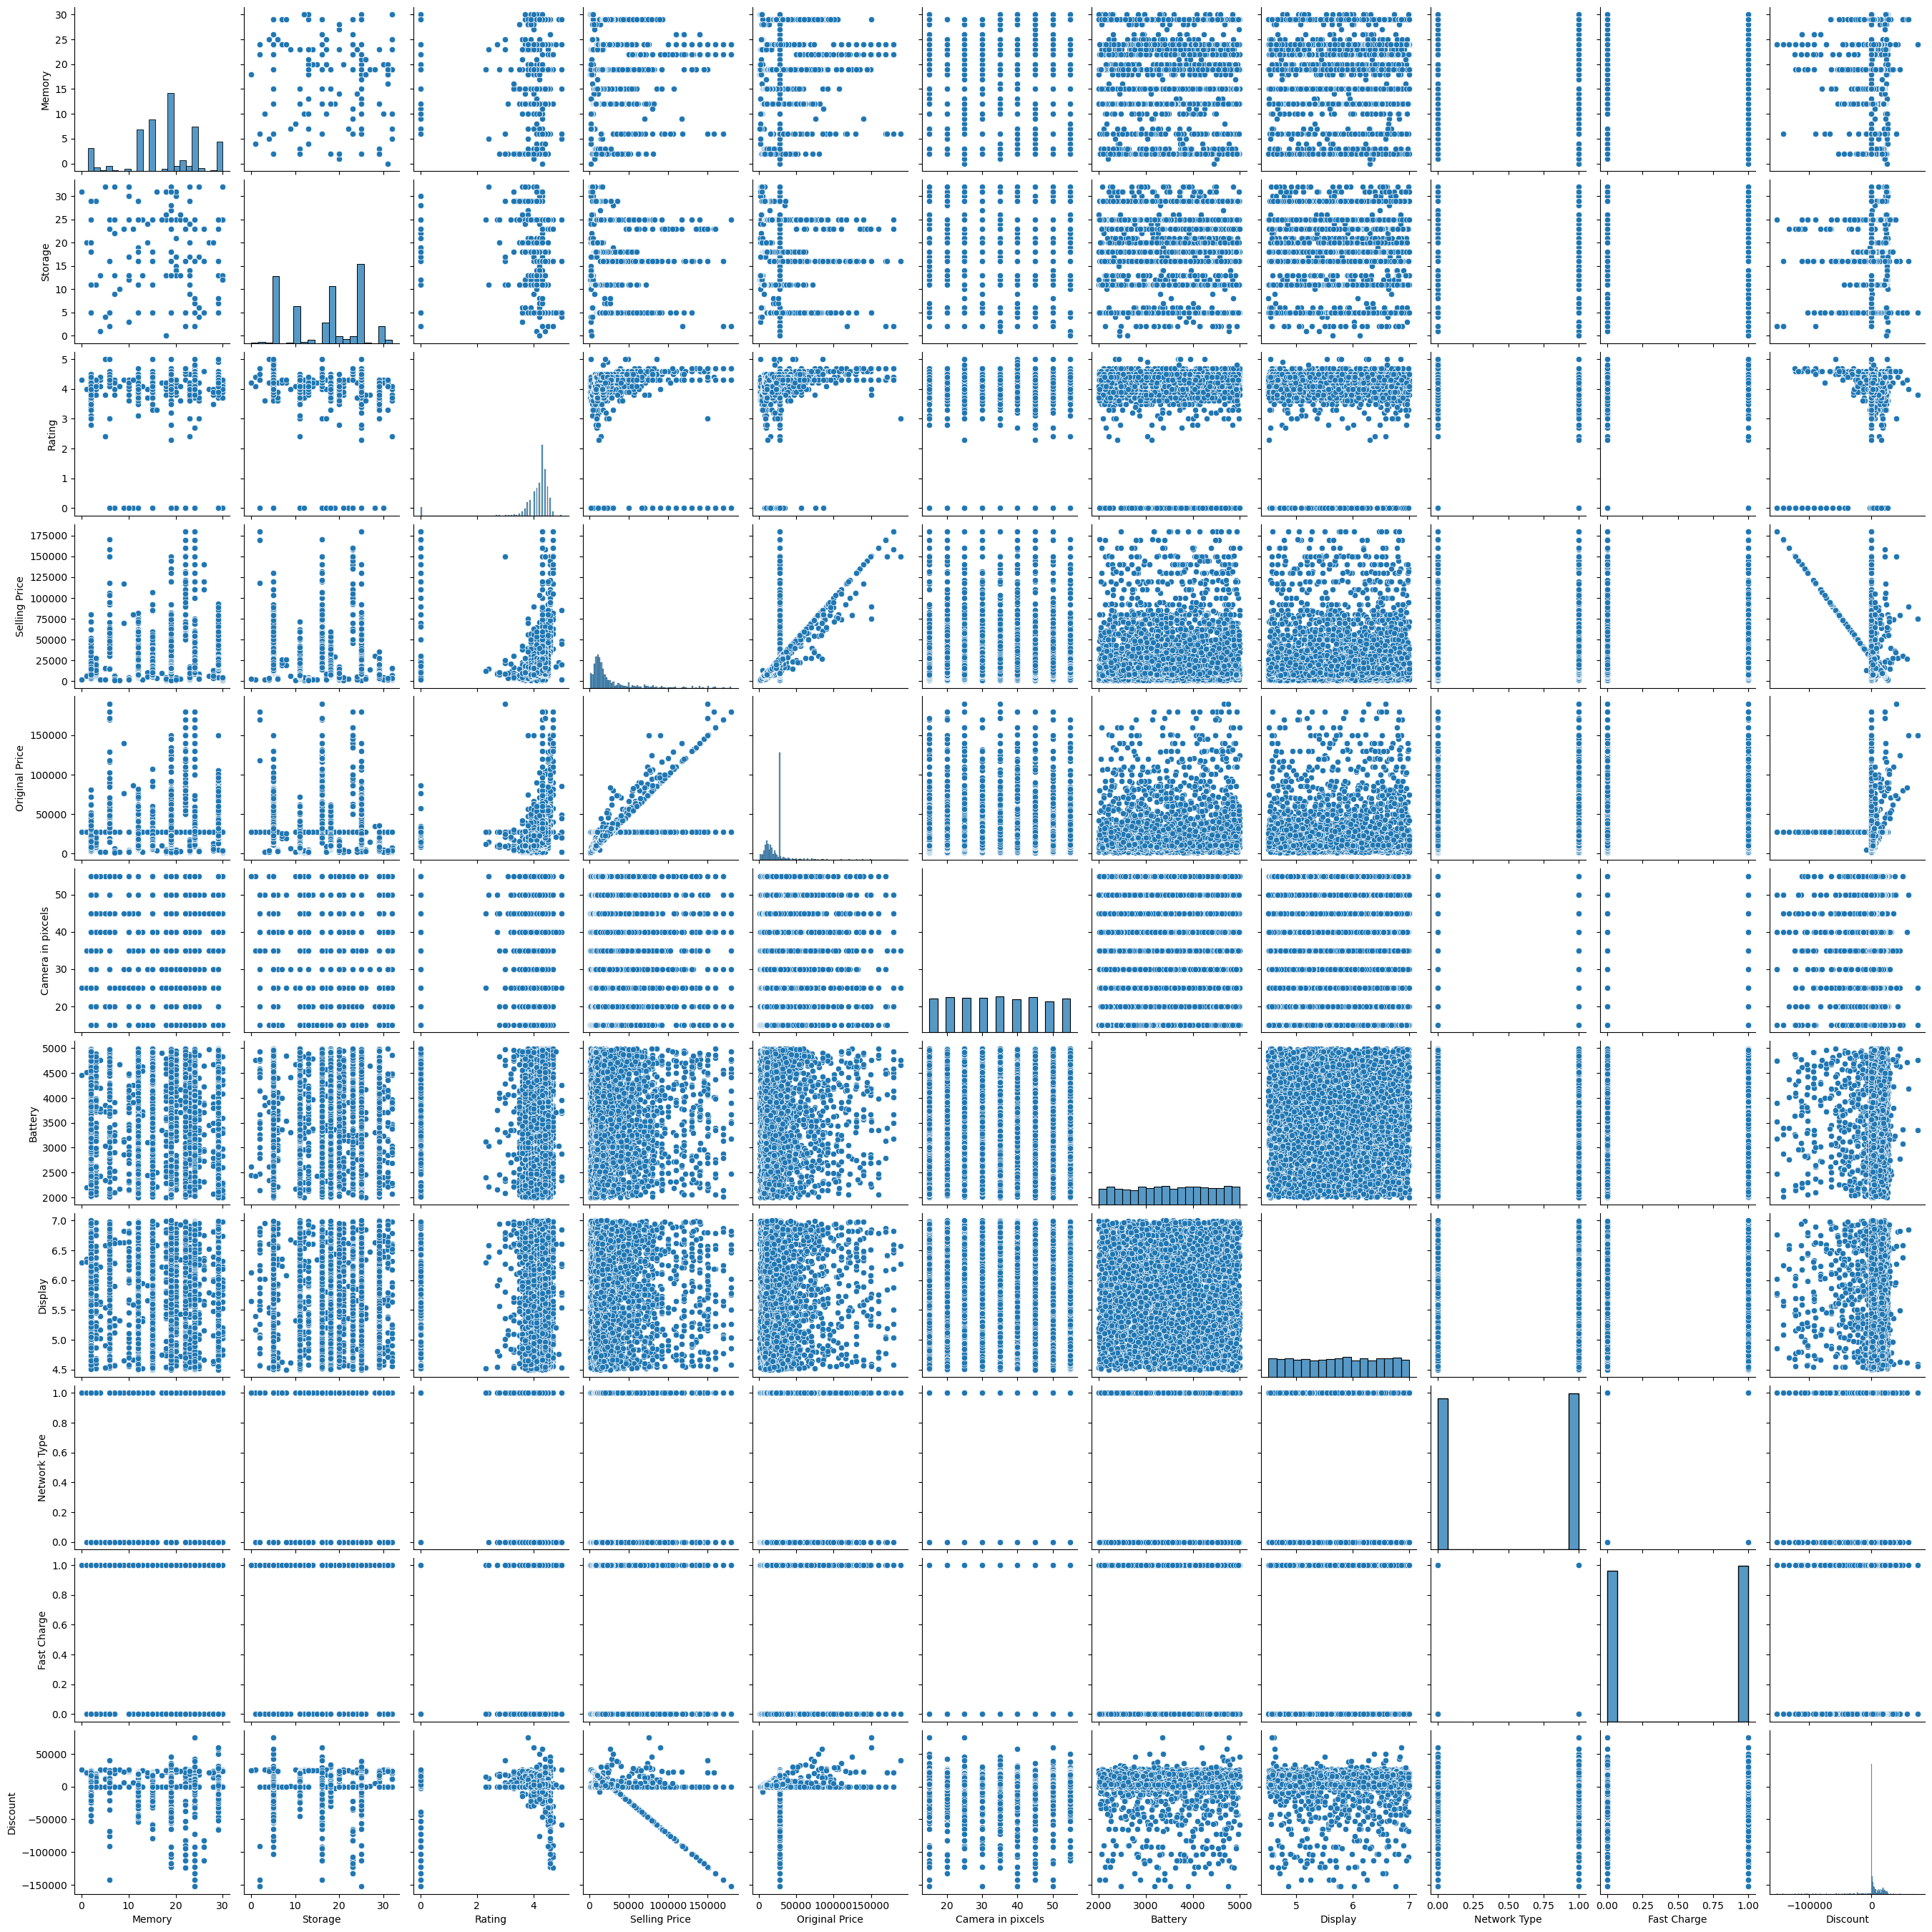

In [45]:
sns.pairplot(data)
plt.show()

C:\Users\AbhilashKY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AbhilashKY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AbhilashKY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhilas

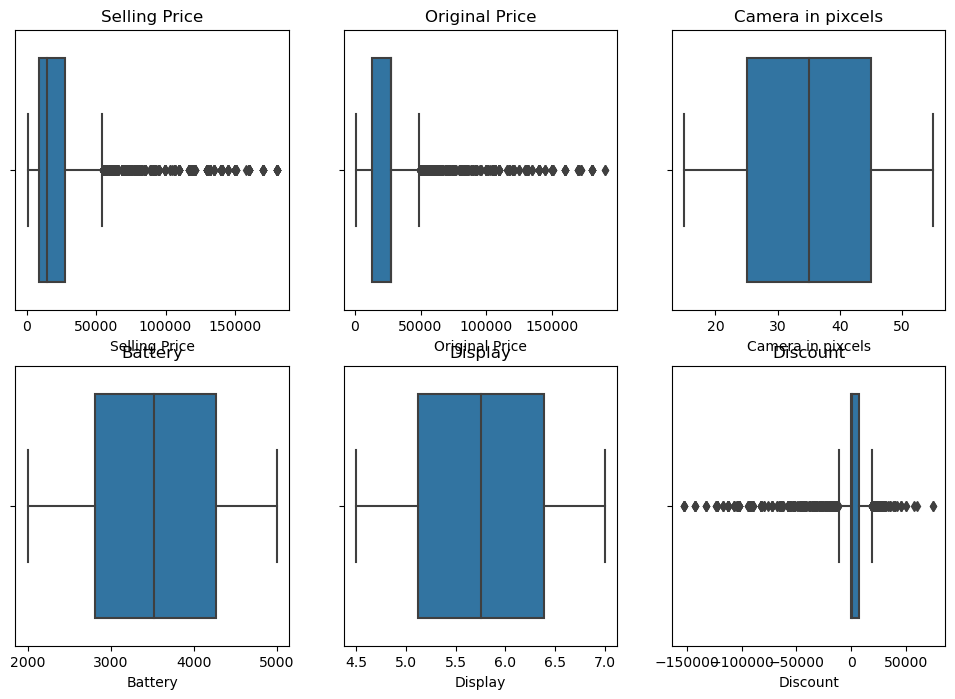

In [46]:
plt.figure(figsize = (12,8))
c=1
for i in numerical_features:
  if c<=6:
    plt.subplot(2,3,c)
    sns.boxplot(data[i])
    plt.title(i)
  c+=1
plt.show()

In [47]:
data.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price', 'Camera in pixcels', 'Battery',
       'Display', 'Network Type', 'Fast Charge', 'Discount'],
      dtype='object')

In [48]:
data = data.drop(columns= ['Color','Model','Display'])

In [49]:
numerical_features1 = data[[
 'Original Price',
 'Camera in pixcels',
 'Battery',
 'Discount',
 'Rating',
 'Network Type',
 'Fast Charge',
 'Selling Price']]

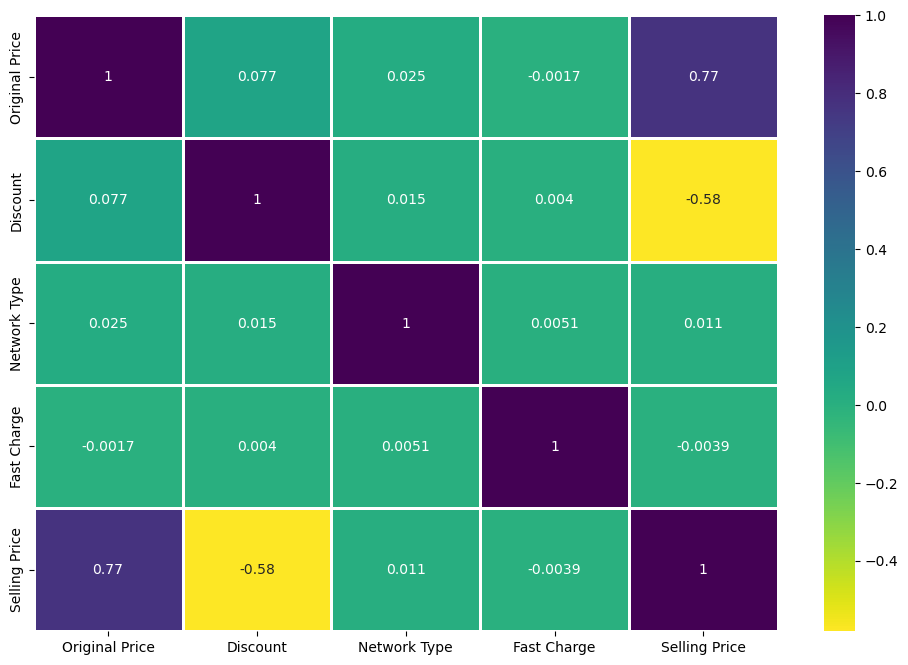

In [50]:
cor = numerical_features1.corr()

plt.figure(figsize = (12,8))
sns.heatmap(cor, annot = True, annot_kws={'size':10}, linewidth = 2, fmt = '0.2g', cmap = 'viridis_r')
plt.show()

In [51]:
numerical_features1.skew()

Original Price       3.135422
Camera in pixcels    0.027070
Battery             -0.038709
Discount            -3.817757
Rating              -4.634825
Network Type        -0.032004
Fast Charge         -0.032004
Selling Price        2.571587
dtype: float64

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [53]:
X = numerical_features1.drop(columns=['Selling Price'])
y = numerical_features1['Selling Price']

In [54]:
x = pd.DataFrame(sc.fit_transform(X), columns = X.columns) # scaler will give out put in array form hence we converting it to dataframe
x

,Original Price,Camera in pixcels,Battery,Discount,Rating,Network Type,Fast Charge
0,0.079313,0.000,0.232232,0.687896,0.90,0.0,0.0
1,0.079313,1.000,0.790791,0.687896,0.90,0.0,0.0
2,0.089895,0.125,0.461461,0.687896,0.86,1.0,1.0
3,0.089895,0.625,0.444111,0.687896,0.86,1.0,1.0
4,0.079313,0.125,0.706039,0.687896,0.90,1.0,0.0
...,...,...,...,...,...,...,...
4684,0.132223,0.875,0.522523,0.670313,0.86,0.0,1.0
4685,0.145234,0.375,0.683684,0.683324,0.86,1.0,1.0
4686,0.161318,0.500,0.988989,0.688995,0.86,0.0,1.0
4687,0.116345,0.875,0.842509,0.670313,0.84,0.0,1.0


In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor as gbr

from sklearn.svm import SVR

In [56]:
# Finding the best random state
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print('Maximum r2 score is', maxAccu,"on Random State", maxRs)

Maximum r2 score is 1.0 on Random State 1


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [58]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr =lr.predict(x_test)
pred_train = lr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_lr))
print('Mean squared error:', mean_squared_error(y_test, pred_lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 score on test data: 1.0
R2 score on train data: 100.0
mean_absolute_error: 4.898472530231166e-11
Mean squared error: 5.206899129218658e-21
Root mean squared error: 7.215884650698525e-11


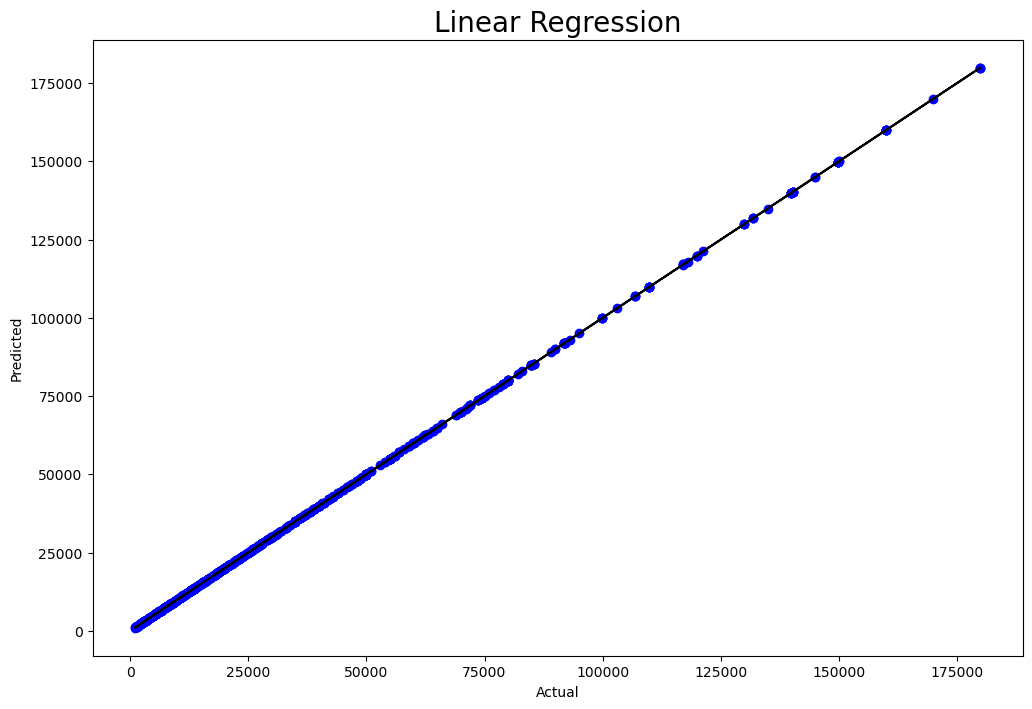

In [59]:
plt.figure(figsize = (12,8))
plt.scatter(x = pred_lr, y = y_test, color = 'blue')
plt.plot(pred_lr, pred_lr, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression', fontsize = 20)
plt.show()

In [60]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf =rf.predict(x_test)
pred_train = rf.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_rf))
print('Mean squared error:', mean_squared_error(y_test, pred_rf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_rf)))

R2 score on test data: 1.0
R2 score on train data: 99.98139886944757
mean_absolute_error: 406.17283276775066
Mean squared error: 11982375.17068022
Root mean squared error: 3461.5567553746996


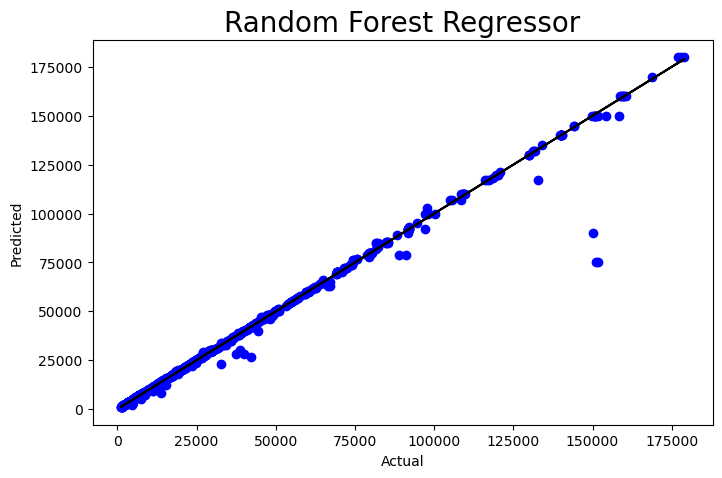

In [61]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_rf, y = y_test, color = 'blue')
plt.plot(pred_rf, pred_rf, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor', fontsize = 20)
plt.show()

In [62]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt =dt.predict(x_test)
pred_train = dt.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_dt))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_dt))
print('Mean squared error:', mean_squared_error(y_test, pred_dt))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_dt)))


R2 score on test data: 0.986870455889469
R2 score on train data: 100.0
mean_absolute_error: 388.69225302061125
Mean squared error: 11981662.278606964
Root mean squared error: 3461.453781087791


In [63]:

knn = KNN()
knn.fit(x_train,y_train)
pred_knn =knn.predict(x_test)
pred_train = knn.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_knn))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 score on test data: 0.8534396698394401
R2 score on train data: 90.93596515464426
mean_absolute_error: 7410.566924932679
Mean squared error: 133746942.36462313
Root mean squared error: 11564.901312359874


In [65]:
gbr = gbr()
gbr.fit(x_train,y_train)
pred_gbr =gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_gbr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:', mean_squared_error(y_test, pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_gbr)))

R2 score on test data: 0.9961002197467348
R2 score on train data: 99.94130580522153
mean_absolute_error: 633.9600209457818
Mean squared error: 3558832.626787537
Root mean squared error: 1886.4868477642606


In [66]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso =lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lasso))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_lasso))
print('Mean squared error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 score on test data: 0.9999998198664909
R2 score on train data: 99.99997960191685
mean_absolute_error: 8.42163126437283
Mean squared error: 164.38490574316504
Root mean squared error: 12.82126771201526


In [68]:
from sklearn.model_selection import cross_val_score as cvs

In [69]:
score1 = cvs(rf,x,y)
print(score1)
print(score1.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_rf)-score1.mean())*100)

[0.99080097 0.93473337 0.93674056 0.99329861 0.99905688]
97.09260774687012
Difference between the r2 score and  validation score :  1.5943597231338202


In [70]:
score2 = cvs(knn,x,y)
print(score2)
print(score2.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_knn)-score2.mean())*100)

[0.12500686 0.2101851  0.75419997 0.84591252 0.90152781]
56.73664505322209
Difference between the r2 score and  validation score :  28.60732193072192


In [71]:
score3 = cvs(dt,x,y)
print(score3)
print(score3.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_dt)-score3.mean())*100)

[0.99434038 0.95168717 0.93991446 0.98280942 0.99300725]
97.23517367277408
Difference between the r2 score and  validation score :  1.45187191617282


In [72]:
score4 = cvs(gbr,x,y)
print(score4)
print(score4.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_gbr)-score4.mean())*100)

[0.98906457 0.94097096 0.98087117 0.99620619 0.99838354]
98.10992863891934
Difference between the r2 score and  validation score :  1.500093335754138


In [73]:
score5 = cvs(lasso,x,y)
print(score5)
print(score5.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_lasso)-score5.mean())*100)

[0.99999962 0.99999304 0.99999979 0.99999967 0.99999988]
99.99984008434548
Difference between the r2 score and  validation score :  0.00014190230360755507


From the above differnce between the r2 score and cross validation score of all the model we can conclude that Lasso regressor model is the best fit

Applying Hypertuning on best fit model

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param = {'alpha':range(1,10),
        'fit_intercept': [True,False],
        'selection':['cyclic', 'random'],
        'positive':[False,True],
        'random_state':range(10,30),
         }
gscv = GridSearchCV(Lasso(),param, cv = 3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': range(1, 10), 'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': range(10, 30),
                         'selection': ['cyclic', 'random']})

In [76]:
gscv.best_params_

{'alpha': 1,
 'fit_intercept': True,
 'positive': False,
 'random_state': 11,
 'selection': 'random'}

In [77]:
Model = Lasso(alpha = 1,fit_intercept = True, positive = False,random_state = 11,selection = 'random')

In [78]:
Model.fit(x_train,y_train)
predict = Model.predict(x_test)
print("R2 score:", r2_score(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,predict))
print('Mean squared error:', mean_squared_error(y_test, predict))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, predict)))


R2 score: -0.93120365561648
mean_absolute_error: 8.42913482846167
Mean squared error: 164.86410486914744
Root mean squared error: 12.839941778261592


In [79]:

import pickle
filename = 'mobile_price.pkl'
pickle.dump(Model,open(filename,'wb'))

In [80]:
loaded_model = pickle.load(open('mobile_price.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

99.99998193413829


In [81]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index = ["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406
Predicted,18002.423251,28988.7241,10009.134955,25999.073639,7505.314592,5501.689272,11394.850946,27239.26122,10004.335176,49982.941418,...,46288.575811,11007.569153,10504.379369,8009.268256,32997.834654,49990.410525,15993.249611,38995.239456,69984.447852,12994.730244
Original,17999.000000,28990.0000,10000.000000,25999.000000,7499.000000,5490.000000,11390.000000,27239.00000,9999.000000,49990.000000,...,46300.000000,10999.000000,10499.000000,7999.000000,32999.000000,49999.000000,15990.000000,39000.000000,70000.000000,12990.000000


In [82]:
from flask import Flask, request, jsonify
app = Flask(__name__)

In [83]:
def predict():
    data = request.get_json(force=True)
    dff = pd.DataFrame(numerical_features1, index=[0])
    prediction = model.predict(dff)
    output = prediction[0]
    return jsonify({'prediction': output})

In [84]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\AbhilashKY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
